In [1]:
# 시스템 모듈 불러오기
import sys
assert sys.version_info >= (3, 5)

# pip를 통해 설치한 모듈 불러오기, 에러가 나면 모듈 관련해서 확인(설치 여부, 버전)
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
# help(sklearn)

In [3]:
# dir(mpl)

In [4]:
# sklearn.__version__

In [5]:
# mpl.pyplot is plt

In [6]:
import os # 운영체제 기능을 사용할 때
폴더_경로 = "./housing"
if not os.path.isdir(폴더_경로): # 지정된 경로에 폴더가 없으면
    os.makedirs(폴더_경로) # 지정된 이름의 폴더 만들기

데이터셋_폴더_경로 = os.path.join(폴더_경로, "datasets") # 경로 합치기
os.makedirs(데이터셋_폴더_경로, exist_ok=True)

이미지_폴더_경로 = os.path.join(폴더_경로, "images")
os.makedirs(이미지_폴더_경로, exist_ok=True) # 폴더가 이미 있어도 ok

In [7]:
압축파일_경로 = os.path.join(데이터셋_폴더_경로, "housing.tgz")

In [8]:
import urllib.request as urlReq # url을 통해 데이터를 요청할 때
urlReq.urlretrieve( # url을 통해 압축파일 받기
    "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/housing/housing.tgz",
    압축파일_경로)

('./housing\\datasets\\housing.tgz',
 <http.client.HTTPMessage at 0x1d1d67e23c8>)

In [9]:
import tarfile # .tar나 .tgz 파일로 압축하거나 풀 때
housing_tgz = tarfile.open(압축파일_경로) # 압축파일 열기
housing_tgz.extractall(path=데이터셋_폴더_경로) # 압축파일 풀기
housing_tgz.close() # 압축파일 닫기

In [10]:
데이터셋_파일_경로 = os.path.join(데이터셋_폴더_경로, "housing.csv") # 경로 합치기

# pandas가 csv파일을 읽어 housing 변수에 DataFrame 객체 형태로 데이터 넣기
housing = pd.read_csv(데이터셋_파일_경로)

In [11]:
# help(housing) # 파이썬의 help 함수로 housing 변수가 무엇인지 확인
# dir(housing) # 파이썬의 dir 함수로 housing 객체의 속성 및 메서드 확인
# housing # pandas의 DataFrame 객체

In [12]:
housing.head() # DataFrame 객체의 head() 메서드
# housing.tail(10) # DataFrame 객체의 tail() 메서드
housing.info() # DataFrame 객체의 info() 메서드

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing.describe() # DataFrame 객체의 describe() 메서드

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
# housing["longitude"] # DataFrame 객체에서 속성 이름으로 열 접근
# housing[:3] # DataFrame 객체에서 인덱스로 행 접근
# help(housing["longitude"]) # pandas.Series 객체
# housing["latitude"].dtype # Series 객체의 dtype 속성
# housing["housing_median_age"].value_counts()
# housing["total_bedrooms"].size
# housing["total_bedrooms"].notnull()
housing["ocean_proximity"].value_counts() # Series 객체의 value_counts() 메서드

# 시간이 남으면... str 객체
# housing["ocean_proximity"].dtype # Dtype: object, 어떤 object ?
# housing["ocean_proximity"][0] # DateFrame객체의 열(Series 객체)과 행(Series 객체의 인덱스)으로 특성 접근
# help(housing["ocean_proximity"][0])
# dir(housing["ocean_proximity"][0])
# housing["ocean_proximity"][0].__class__ # python 객체의 __class__ 속성
# housing.__class__
# housing["ocean_proximity"].__class__
# (1).__class__
# ().__class__ # 1.0, True, "문자열"
# help(int)
# help("int")

# 시간이 남으면... null 데이터
# total_bedrooms_notnull = [x for x in housing["total_bedrooms"].notnull() if x == True]
# total_bedrooms_null = [x for x in housing["total_bedrooms"].notnull() if x == False]
"""
total_bedrooms = housing["total_bedrooms"]
total_bedrooms_notnull = []
for x in total_bedrooms.notnull():
    if x == True:
        total_bedrooms_notnull.append(x)
""";
# len(total_bedrooms_null)

# 시간이 남으면... 자료형과 객체 변환
# int("5")
# int(5.8)
# float("5")
# str(1.234)
# bool("true")
# housing.to_numpy() # pandas의 DataFrame 객체를 numpy의 ndarray 객체로(Object로 요소가 들어감)
# housing_num = housing.drop("ocean_proximity", axis=1) # housing에서 문자열 속성 제거
# housing_num.to_numpy() # 수치형 데이터만 가지고 변환

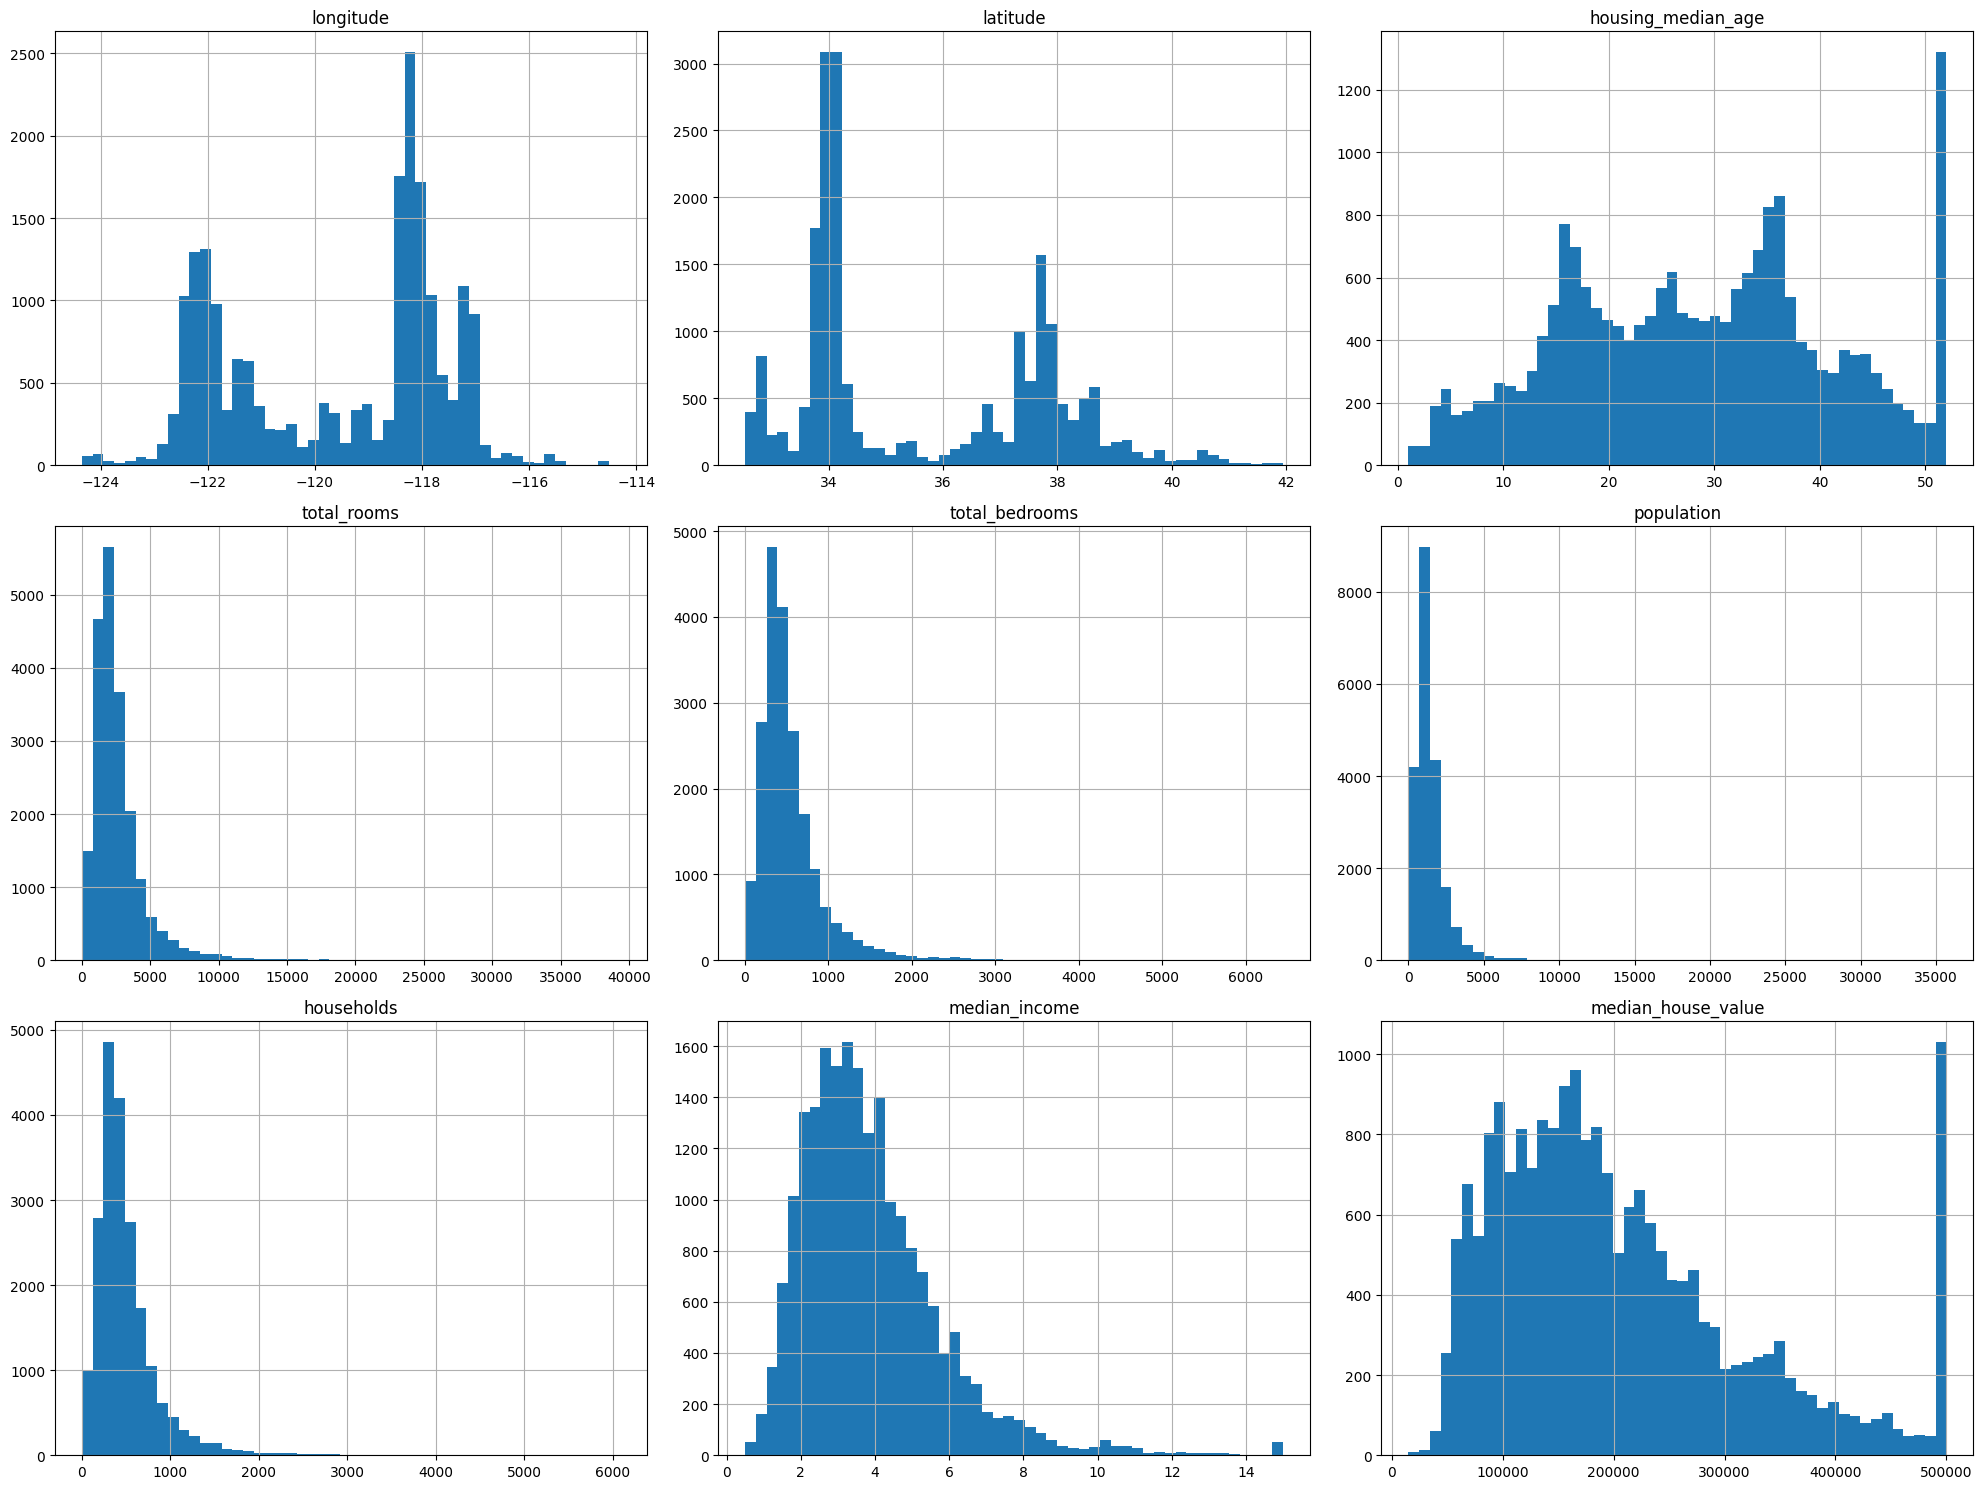

In [15]:
housing.hist(bins=50, figsize=(20,15)) # DataFrame 객체의 hist() 메서드, matplotlib.pyplot.hist 사용
히스토그램_경로 = os.path.join(이미지_폴더_경로, "attribute_histogram_plots.png")
plt.tight_layout() # 여백 설정
plt.savefig(히스토그램_경로, format="png", dpi=300) # 이미지 파일 저장
plt.show() # 이미지 보이기

In [16]:
def save_fig(파일_이름, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(이미지_폴더_경로, 파일_이름 + "." + fig_extension)
    print("그림 저장: ", 파일_이름)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [17]:
# 훈련 데이터 나누기, 훈련 세트와 테스트 세트로
# len(housing)
housing_test = housing[:4128]
housing_train = housing[4128:]

In [18]:
# housing_test
# housing_test.info()
# housing_test.describe()
housing_test["ocean_proximity"].value_counts()

INLAND        1823
NEAR BAY      1287
<1H OCEAN      911
NEAR OCEAN     107
Name: ocean_proximity, dtype: int64

In [19]:
# housing_train
# housing_train.info()
# housing_train.describe()
housing_train["ocean_proximity"].value_counts()

<1H OCEAN     8225
INLAND        4728
NEAR OCEAN    2551
NEAR BAY      1003
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
# len(housing)
np.random.permutation(len(housing))

array([  694, 19657,  4222, ..., 18139, 14939, 15207])

In [21]:
# 방법 1: 훈련 데이터의 순서를 섞어서 사용
# 훈련 데이터를 섞은 후에 test_ratio 만큼의 비율로 테스트 세트와 훈련 세트로 나누는 함수 정의
def split_train_test(data, test_ratio):
    # 훈련 데이터 길이의 난수 배열(numpy.ndarray) 생성
    shuffled_indices = np.random.permutation(len(data))
    # 훈련 데이터의 길이에 test_ratio를 곱해서 테스트 세트 크기 지정
    test_set_size = int(len(data) * test_ratio)
    # 난수 배열의 앞 부분, 지정한 크기만큼, 테스트 세트
    test_indices = shuffled_indices[:test_set_size]
    # 난수 배열의 뒷 부분, 훈련 세트
    train_indices = shuffled_indices[test_set_size:]
    # 난수 배열의 순서대로 훈련 데이터를 가져오기
    # DataFrame 객체의 iloc 속성, 정수를 사용하여 행[, 열] 인덱싱
    # 두 개의 결과 값 리턴, 쉼표로 나열
    return data.iloc[train_indices], data.iloc[test_indices]

In [22]:
# housing.iloc[[3,6,4,5,7]]

In [23]:
# housing[:10]

In [24]:
# DataFrame 객체의 loc 속성, index[와 column]을 사용하여 행[, 열] 인덱싱
# housing.loc[[3230,8879,3555,19480,13685]]
# housing.loc[:,"population"]

In [25]:
# 시간이 남으면... 파이썬에서 쉼표 연산자 사용
# 사례 1: 함수의 인자를 나열하는 경우
# print(10, 20, 30, 40)
# 사례 2: list, tuple, set, dict 객체를 초기화(정의)할 때
# s = [1, 2, 3, 3] # list 객체 정의
# s = (1, 2, 3, 3) # tuple 객체 정의
# s = {1, 2, 3, 3} # set 객체 정의
# s = {'x': 1, 'y': 2, 'z': 3, 'w': 3} # dict(dictionary) 객체 정의
# s['x']
# print(s)
# 사례 3: 변수를 동시에 초기화(정의)할 때
# a, b, c, d = 1, 2, 3, 4
# a, b, c, d = s
# print(a, b, c, d)
# 사례 4: 함수에서 여러 값을 반환할 때
'''
def return_xyzw(x, y, z=3, w=4):
    return x + 1, y, z, w
''';
# a, b, c, d = return_xyzw(1, y=5, w=10)
# print(a, b, c, d)

In [26]:
housing_train, housing_test = split_train_test(housing, 0.2)

In [27]:
# housing_test
# housing_test.info()
# housing_test.describe()
housing_test["ocean_proximity"].value_counts()

<1H OCEAN     1835
INLAND        1334
NEAR OCEAN     512
NEAR BAY       447
Name: ocean_proximity, dtype: int64

In [28]:
# housing_train
# housing_train.info()
# housing_train.describe()
housing_train["ocean_proximity"].value_counts()

<1H OCEAN     7301
INLAND        5217
NEAR OCEAN    2146
NEAR BAY      1843
ISLAND           5
Name: ocean_proximity, dtype: int64

In [29]:
# 사이킷런의 train_test_split 함수
from sklearn.model_selection import train_test_split
housing_train, housing_test = train_test_split(housing, test_size = 0.2)

In [30]:
# 방법 2: np.random.seed() 함수를 사용, 일정한 난수 순서
housing_train, housing_test = train_test_split(housing, test_size = 0.2, random_state=42)
housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [31]:
# 방법 3: 해시값을 이용, 해시 함수는 데이터를 고정 길이 값으로 변환, 암호나 오류 검출 등에 사용
from zlib import crc32

# print(hex(crc32(b"hello world!")))
# print(hex(crc32(b"hello world!"))) # 특징 1: 같은 입력이면 같은 출력 값, 난수가 아님
# print(hex(crc32(b"\xB1")))
# print(hex(crc32(b"\xB2"))) # 특징 2: 값이 조금만 바뀌어도 완전히 다른 값
# print(hex(crc32(b"hello world!")))
'''print(hex(crc32(b"""
hello world! this is very long message.
hello world! this is very long message.
hello world! this is very long message.
hello world! this is very long message.
""")))'''; # 특징 3: 데이터의 길이와 무관하게 사용
# print(hex(crc32(b"b5a7b602ab754d7ab30fb42c4fb28d82")))
# print(hex(crc32(b"d19f2e9e82d14b96be4fa12b8a27ee9f"))) # 특징 4: 다른 값을 가지는 데이터, 같은 결과

In [32]:
# crc32의 결과가, test_ratio 비율 안에 들면 True, 아니면 False
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# 인덱스에 위 함수를 적용, 결과가 False면 훈련 세트, True면 테스트 세트
def split_train_test_by_id(data, test_ratio, id_column):
    def id_check(id_):
        return test_set_check(id_, test_ratio)
    ids = data[id_column]
    in_test_set = ids.apply(id_check) # Series 객체의 apply() 메서드
    # in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio)) # 함수 대신에 람다식 사용
    return data.loc[~in_test_set], data.loc[in_test_set]

In [33]:
# housing.reset_index() # DataFrame 객체의 reset_index() 메서드
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임을 반환합니다
housing_train, housing_test = split_train_test_by_id(housing_with_id, 0.2, "index")
housing_test

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


In [34]:
# 방법 4: 변하지 않는 특성을 이용하여 해시 함수 적용
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
housing_train, housing_test = split_train_test_by_id(housing_with_id, 0.2, "id")

<AxesSubplot:>

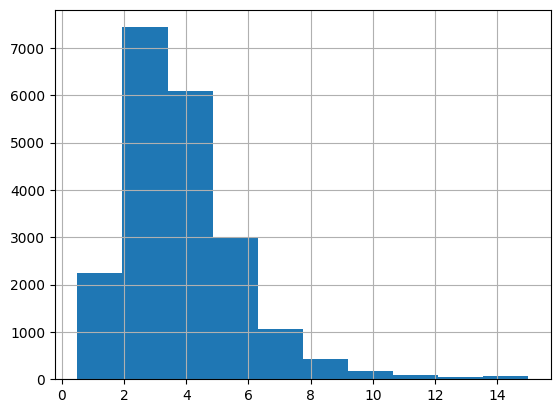

In [35]:
# 방법 5: 계층적 샘플링, 나이/성별/수입 등 데이터의 비율이 일정하게
housing["median_income"].hist() # Series 객체의 hist() 메서드

In [36]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

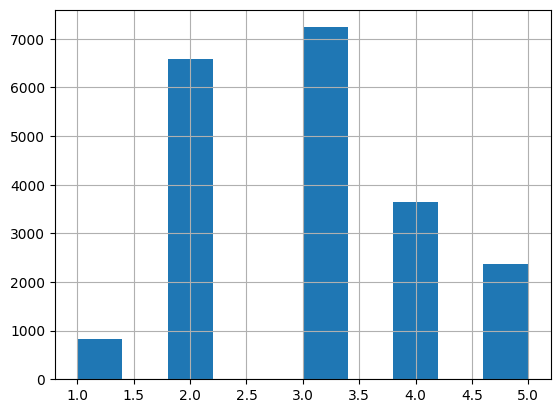

In [37]:
housing["income_cat"].hist()

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # StratifiedShuffleSplit 객체 생성
for train_index, test_index in split.split(housing, housing["income_cat"]): # StratifiedShuffleSplit 객체 이용, generator를 생성
    housing_strat_train = housing.loc[train_index]
    housing_strat_test = housing.loc[test_index]

In [39]:
housing_strat_test["income_cat"].value_counts() / len(housing_strat_test) # 분위별 비율 확인

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [40]:
housing_strat_train["income_cat"].value_counts() / len(housing_strat_train)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [41]:
def income_cat_proportions(data): # 분위별 비율, Series 객체 반환
    return data["income_cat"].value_counts() / len(data)

housing_random_train, housing_random_test = train_test_split(housing, test_size=0.2) #, random_state=42)
# housing_hash_train, housing_hash_test = split_train_test_by_id(housing.reset_index(), 0.2, "index")

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(housing_strat_test),
    "Random": income_cat_proportions(housing_random_test),
    # "Hash": income_cat_proportions(housing_hash_test),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
# compare_props["Hash %error"] = 100 * compare_props["Hash"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.034884,-12.408759,-0.243309
2,0.318847,0.318798,0.323886,1.580307,-0.015195
3,0.350581,0.350533,0.348110,-0.704809,-0.013820
4,0.176308,0.176357,0.183624,4.149492,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [42]:
for set_ in (housing_strat_train, housing_strat_test):
    set_.drop("income_cat", axis=1, inplace=True) # DataFrame 객체의 drop() 메서드

그림 저장:  bad_visualization_plot


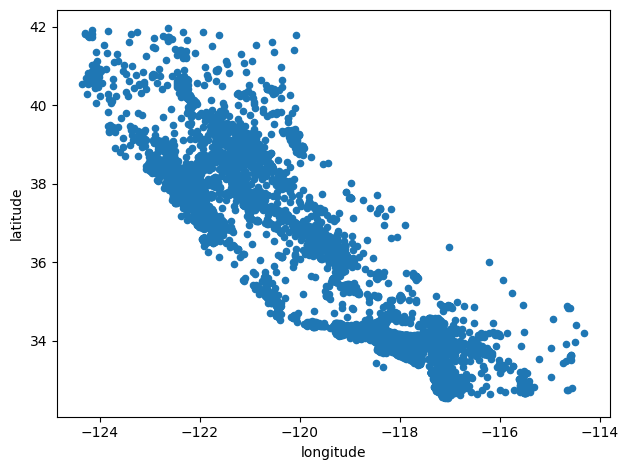

In [43]:
housing = housing_strat_train.copy()
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

그림 저장:  better_visualization_plot


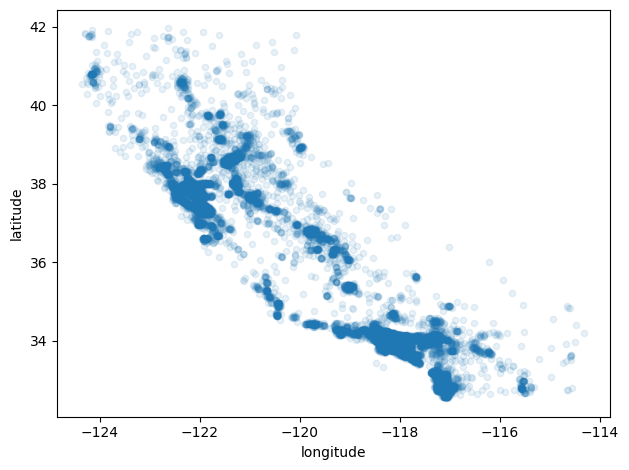

In [44]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # 투명도
save_fig("better_visualization_plot")

그림 저장:  housing_prices_scatterplot


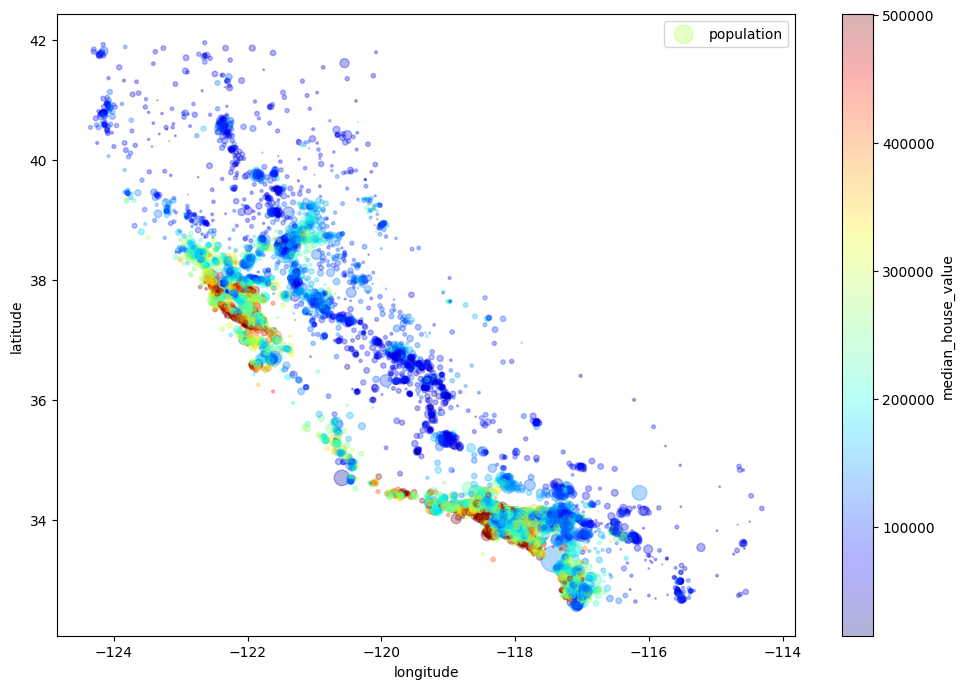

In [45]:
# 인구 수가 많은 지역은 원을 크게
# 집 값에 따라 다른 색깔
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

In [46]:
corr_matrix = housing.corr() # 각 속성과 다른 속성 간의 상관 관계

In [47]:
corr_matrix["median_house_value"].sort_values(ascending=False) # 속성들, 집 값과 상관 관계가 강한 순서

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

그림 저장:  scatter_matrix_plot


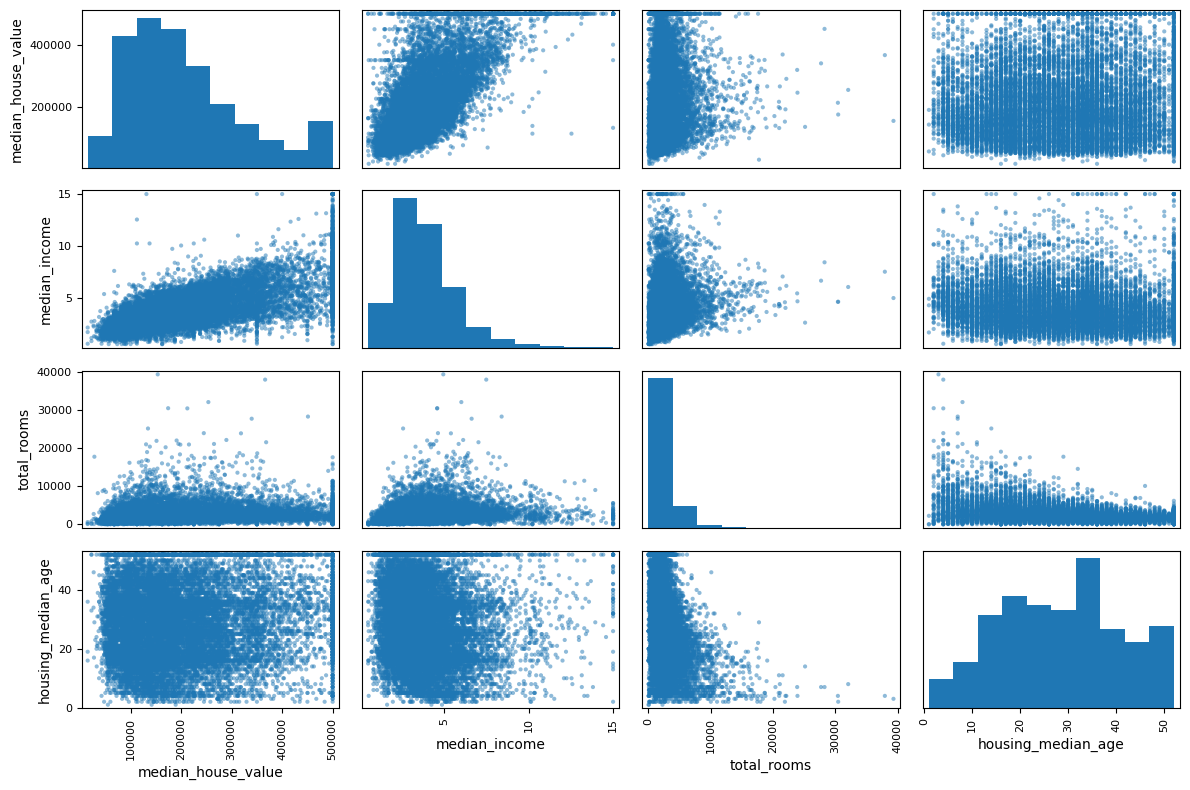

In [48]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"] # 확인할 속성으로 리스트 생성
scatter_matrix(housing[attributes], figsize=(12, 8)) # 해당하는 속성만 가진 DataFrame, 산점도 그래프
save_fig("scatter_matrix_plot")

그림 저장:  income_vs_house_value_scatterplot


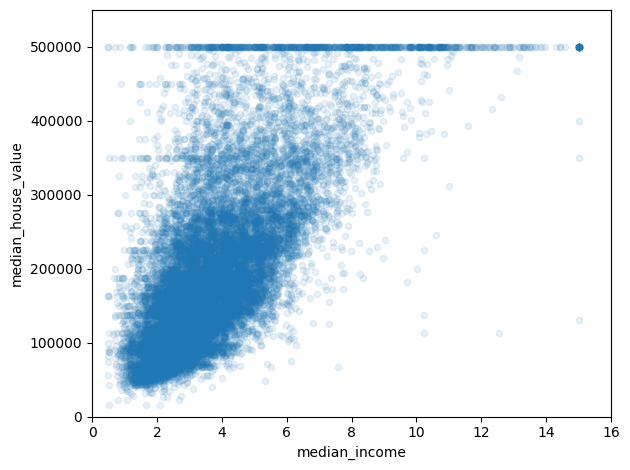

In [49]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1) # 수입과 집 값에 대한 산점도
plt.axis([0, 16, 0, 550000]) # 데이터 오류 확인을 위해 y축 늘이기
save_fig("income_vs_house_value_scatterplot")

In [50]:
# 두 가지 이상의 속성으로 새로운 속성 만들기
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"] # 방 수, 가구 수
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"] # 침실 수, 방 수
housing["population_per_household"] = housing["population"] / housing["households"] # 인구 수, 가구 수

In [51]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False) # 속성이 추가된 집 값과의 상관 관계

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

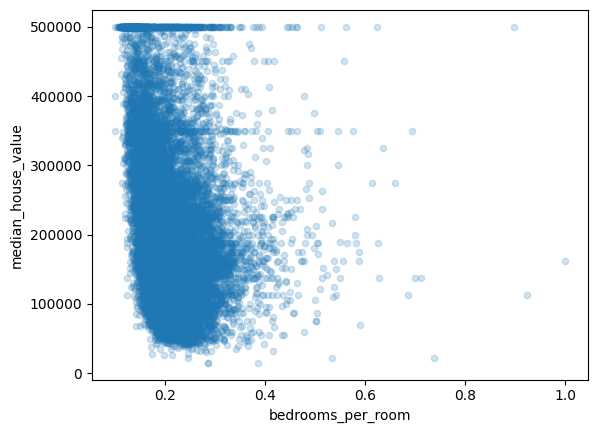

In [52]:
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.2)
plt.show()

In [53]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


In [54]:
# scatter_matrix(housing, figsize=(48, 32))
# save_fig("scatter_matrix_plot_all")

In [55]:
housing = housing_strat_train.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housing_labels = housing_strat_train["median_house_value"].copy() # 훈련 세트의 레이블

In [56]:
# 누락된 특성 처리하기
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [57]:
# housing.isnull()
# housing.isnull().any(axis=1)

In [58]:
# 방법 1: 행을 없애기
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [59]:
# 방법 2: 열을 없애기
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [60]:
# 방법 3: 다른 값으로 채우기(평균, 중간, 최소, 최대), imputer 사용, sklearn에서는 3 가지 제공
median = housing["total_bedrooms"].median() # 중간값 추출
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # 중간값으로 채우는 SimpleImputer 객체
imputer.strategy

'median'

In [62]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num) # imputer가 훈련 세트의 중간값을 획득

SimpleImputer(strategy='median')

In [63]:
imputer.statistics_ # SimpleImputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [64]:
X = imputer.transform(housing_num)
# X = imputer.fit_transform(housing_num) # 변환기에서 설명
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index) # 누락된 값을 채운 새로운 DataFrame 객체

In [65]:
housing_tr.loc[sample_incomplete_rows.index.values] # 누락된 데이터의 인덱스 확인

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [66]:
# 범주형 특성 처리, encoder를 사용, sklearn에서는 3 가지 제공
housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7276
INLAND             5263
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

In [67]:
# 방법 1: OrdinalEncoder, 0, 1, 2, ...과 같은 숫자값으로 바꿔주기
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder() # OrdinalEncoder 객체 생성
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) # 범주형 속성 데이터 획득
housing_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [68]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [69]:
# 방법 2: OneHotEncoder, 1이 하나, 나머지 0인 배열로 바꿔주기
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False) # OneHotEncoder 객체 생성
# cat_encoder.fit(housing_cat) # 변환기에서 설명
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) # 범주형 속성 데이터 획득
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [70]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [71]:
# 특성 추가하기, pandas의 DataFrame 객체는 sklearn의 파이프라인에서 연산이 곤란
housing_ft = housing.copy()

housing_ft["rooms_per_household"] = housing_ft["total_rooms"] / housing_ft["households"] # 방 수, 가구 수
housing_ft["bedrooms_per_room"] = housing_ft["total_bedrooms"] / housing_ft["total_rooms"] # 침실 수, 방 수
housing_ft["population_per_household"] = housing_ft["population"] / housing_ft["households"] # 인구 수, 가구 수
housing_ft

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,0.231341,3.047847
...,...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,6.052381,0.185681,2.728571
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,4.635659,0.245819,4.077519
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,6.346405,0.179609,2.742484
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,5.505618,0.193878,3.808989


In [72]:
# 사용자 정의 변환기 만들기
# 변환기: 특성 정제/조합/스케일링, 사이킷런 파이프라인에서 사용, 입력 데이터는 array-like 객체(ndarray)
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
# rooms_ix, bedrooms_ix, population_ix, households_ix = [housing.columns.get_loc(c) for c in ["total_rooms", "total_bedrooms", "population", "households"]]

housing_indexs = {
    'rooms_ix': rooms_ix,
    'bedrooms_ix': bedrooms_ix,
    'population_ix': population_ix,
    'households_ix': households_ix,
}

# BaseEstimator: 다른 Estimator의 기본이 되는 클래스, get_params(), set_params() 메서드를 가지고 있음
# Estimator란? sklearn의 핵심, 데이터로부터 학습을 하는 객체, 분류/회귀/클러스터링/변환기에 사용
# TransformerMixin: 다른 Transfomer의 기본이 되는 클래스, fit_transform() 메서드를 가지고 있음
# fit_transform() 메서드는 fit() 메서드 수행 후 transform() 메서드를 수행
# SimpleImputer, OrdinalEncoder, OneHotEncoder도 변환기이므로 위 두 개 클래스를 상속
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    # 객체 초기화 메서드, 전달받은 인수를 저장
    # def __init__(self, add_bedrooms_per_room=True, rooms_ix=3, bedrooms_ix=4, population_ix=5, households_ix=6):
    # def __init__(self, add_bedrooms_per_room=True, housing_indexs):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room # 변환기에 특성 추가
        # self.rooms_ix = rooms_ix
        # self.bedrooms_ix = bedrooms_ix
        # self.population_ix = population_ix
        # self.households_ix = households_ix
        # self.housing_indexs = housing_indexs
    # fit() 메서드, 학습을 위한 메서드
    # 변환기에서는 데이터로부터 전처리에 필요한 특성을 만드는 데 사용
    # 데이터로부터 학습을 위한 메서드이기 때문에 학습 내용을 객체(self)에 저장
    # transform() 메서드를 사용하기 전에 사용해야 함
    def fit(self, X, y=None): # 전처리에서는 y가 필요하지 않음, 학습이 필요할 때는 y를 사용
        return self # 아무것도 하지 않습니다
    # transform() 메서드, 실제 변환을 수행하는 메서드
    # 입력된 데이터에 변환을 수행한 결과를 반환
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] # 새로운 특성 생성
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room] # 기존의 데이터에 특성을 추가한 데이터를 반환
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# 사용자 정의 변환기 객체 생성
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# 사이킷런 연산을 위해 ndarray 객체로 변환
# 변환 결과를 housing_extra_attribs 변수에 저장
housing_extra_attribs = attr_adder.transform(housing.to_numpy())

In [73]:
# 시간이 남으면... 파이썬 함수의 인자들
'''
def function_one(arg, *args, kwarg=10, **kwargs): # 인자와 인자의 배열, 키워드 인자
    print(arg)
    for post in args:
        print(post)
    print(kwarg)
    for key, value in kwargs.items():
        if key=='name':
            print(value)

function_one("how", "are", kwarg="you", name="John", age=10, gender="male")
''';

In [74]:
housing_extra_attribs[0]

array([-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
       '<1H OCEAN', 4.625368731563422, 2.094395280235988], dtype=object)

In [75]:
'''
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()
''';

In [76]:
# 특성 스케일링, 수치형 데이터의 범위를 조정하기, sklearn에서는 4 가지 scaler 제공
# MinMaxScaler는 최대값과 최소값을 특정 범위 안으로 조정
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# scaler = MinMaxScaler((-1, 1))
housing_num_scaled = scaler.fit_transform(housing_num)

In [77]:
# print(housing_num)
# housing_num.describe()

In [78]:
# StandardScaler는 데이터의 정규 분포에 따른 표준 편차 값으로 조정
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_num_scaled = scaler.fit_transform(housing_num)

In [79]:
# 파이프라인, 앞의 변환기들을 모두 합치기
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([ # Pipeline 객체 생성, 변환기 튜플의 리스트를 사용
        ('imputer', SimpleImputer(strategy="median")), # 변환기 이름과, 변환기 객체의 튜플
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

# housing_num 배열에 파이프라인 변환기의 fit()과 transform() 메서드 순서대로 적용
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [80]:
# 열 변환기, 수치형과 범주형으로 나눈 두 데이터 합치기
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # dict 객체로 list 만들기, key 값의 리스트
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), # 방금 만든 수치형 데이터 변환기 파이프라인
        ("cat", OneHotEncoder(), cat_attribs), # 범주형 특성 변환기
    ])

# 전체 데이터에 대해 fit(), transform() 적용
housing_prepared = full_pipeline.fit_transform(housing)

In [81]:
import joblib

모델_폴더_경로 = os.path.join(폴더_경로, "models") # 경로 합치기
os.makedirs(모델_폴더_경로, exist_ok=True)

모델_경로 = os.path.join(모델_폴더_경로, "transformer.pkl")
joblib.dump(full_pipeline, 모델_경로) # 전처리 파이프라인 저장하기

['./housing\\models\\transformer.pkl']

In [82]:
load_pipeline = joblib.load(모델_경로) # 전처리기 불러오기

In [83]:
# 다음 스터디 할 내용 모델 선택과 훈련, 평가, 튜닝